# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.5


In [7]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                32832     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 1,608,618
Trainable params: 1,608,618
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 275us/step - loss: 2.1624 - acc: 0.1934 - val_loss: 1.9913 - val_acc: 0.2674
Epoch 2/50
50000/50000 [==============================] - 13s 251us/step - loss: 1.9290 - acc: 0.2950 - val_loss: 1.9256 - val_acc: 0.3019
Epoch 3/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.8473 - acc: 0.3350 - val_loss: 1.8338 - val_acc: 0.3337
Epoch 4/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.7767 - acc: 0.3603 - val_loss: 1.7570 - val_acc: 0.3600
Epoch 5/50
50000/50000 [==============================] - 15s 298us/step - loss: 1.7323 - acc: 0.3775 - val_loss: 1.6961 - val_acc: 0.3908
Epoch 6/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.6885 - acc: 0.3946 - val_loss: 1.6771 - val_acc: 0.3990
Epoch 7/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.6447 - acc: 0.4127 - val_loss: 1.

50000/50000 [==============================] - 14s 278us/step - loss: 2.1142 - acc: 0.2118 - val_loss: 1.9912 - val_acc: 0.2577
Epoch 2/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.9083 - acc: 0.2929 - val_loss: 1.8956 - val_acc: 0.3012
Epoch 3/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.8375 - acc: 0.3226 - val_loss: 1.8309 - val_acc: 0.3340
Epoch 4/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.7749 - acc: 0.3492 - val_loss: 1.7685 - val_acc: 0.3487
Epoch 5/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.7196 - acc: 0.3766 - val_loss: 1.7320 - val_acc: 0.3690
Epoch 6/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.6764 - acc: 0.3924 - val_loss: 1.6411 - val_acc: 0.4126
Epoch 7/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.6342 - acc: 0.4119 - val_loss: 1.6273 - val_acc: 0.4167
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.8580 - acc: 0.3409 - val_loss: 1.7913 - val_acc: 0.3635
Epoch 3/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.7760 - acc: 0.3680 - val_loss: 1.7717 - val_acc: 0.3653
Epoch 4/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.7085 - acc: 0.3910 - val_loss: 1.6902 - val_acc: 0.3994
Epoch 5/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.6572 - acc: 0.4104 - val_loss: 1.6274 - val_acc: 0.4205
Epoch 6/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.6144 - acc: 0.4267 - val_loss: 1.6015 - val_acc: 0.4280
Epoch 7/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.5864 - acc: 0.4349 - val_loss: 1.6013 - val_acc: 0.4224
Epoch 8/50
50000/50000 [==============================] - 15s 292us/step - loss: 1.5509 - acc: 0.4488 - val_loss: 1.5651 - val_acc: 0.4453
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.7856 - acc: 0.3593 - val_loss: 1.7589 - val_acc: 0.3716
Epoch 4/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.7268 - acc: 0.3830 - val_loss: 1.6945 - val_acc: 0.3924
Epoch 5/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.6917 - acc: 0.3957 - val_loss: 1.6843 - val_acc: 0.3961
Epoch 6/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.6501 - acc: 0.4122 - val_loss: 1.6508 - val_acc: 0.4074
Epoch 7/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.6165 - acc: 0.4243 - val_loss: 1.6338 - val_acc: 0.4114
Epoch 8/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.5832 - acc: 0.4353 - val_loss: 1.5773 - val_acc: 0.4366
Epoch 9/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.5585 - acc: 0.4439 - val_loss: 1.5636 - val_acc: 0.4404
Epoch 10/50
50000/50000 [==

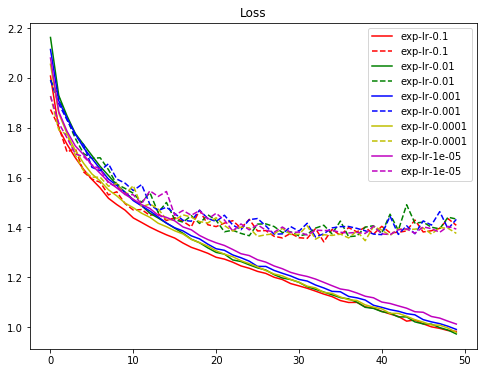

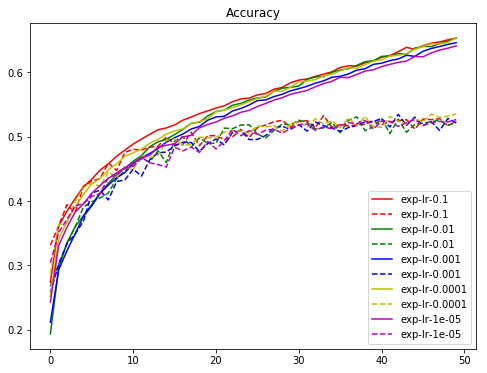

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()